In [168]:
import pandas as pd
import numpy as np
import math
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image, display  
#from omniplot  import plot as op


In [169]:
shooting = pd.read_csv('/Users/cokoli1/Desktop/Personal Portfolio/Prem2022-23-data/players/player_premier_league_shooting.csv')
shooting

,Unnamed: 0,Player,Nation,Pos,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,0,Brenden Aaronson,us USA,"MF,FW",Leeds United,21,26.4,1,41,9,...,0.34,0.02,0.11,0,0,3.9,3.9,0.09,-2.9,-2.9
1,1,George Abbott,eng ENG,MF,Tottenham,16,0.0,0,0,0,...,0.00,NaN,NaN,0,0,0.0,0.0,NaN,0.0,0.0
2,2,Che Adams,sct SCO,FW,Southampton,26,22.1,5,47,14,...,0.63,0.11,0.36,0,0,6.6,6.6,0.14,-1.6,-1.6
3,3,Tyler Adams,us USA,MF,Leeds United,23,24.0,0,4,0,...,0.00,0.00,NaN,0,0,0.1,0.1,0.03,-0.1,-0.1
4,4,Tosin Adarabioyo,eng ENG,DF,Fulham,24,23.2,1,16,4,...,0.17,0.06,0.25,0,0,0.7,0.7,0.04,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,Jordan Zemura,zw ZIM,DF,Bournemouth,22,16.2,0,4,0,...,0.00,0.00,NaN,0,0,0.4,0.4,0.10,-0.4,-0.4
565,565,Oleksandr Zinchenko,ua UKR,DF,Arsenal,25,23.5,1,28,7,...,0.30,0.04,0.14,0,0,1.4,1.4,0.05,-0.4,-0.4
566,566,Hakim Ziyech,ma MAR,"FW,MF",Chelsea,29,7.3,0,16,3,...,0.41,0.00,0.00,0,0,0.6,0.6,0.04,-0.6,-0.6
567,567,Kurt Zouma,fr FRA,DF,West Ham,27,22.1,2,19,5,...,0.23,0.11,0.40,0,0,2.2,2.2,0.12,-0.2,-0.2


In [170]:
def sort_highest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName, ascending=False, inplace=True)

    return df

def sort_lowest(df: pd.DataFrame,columnName: str) -> pd.DataFrame:
    df.sort_values(by = columnName, ascending=True, inplace=True)

def drop_columns(df: pd.DataFrame,columnNames: list()) -> pd.DataFrame:
    df.drop(columns=columnNames, inplace=True)

    return df



In [171]:

shooting_df = shooting.sort_values(by='xG',ascending=False)
shooting_df.rename(columns={'Pos':'Position'},inplace=True)
shooting_df.reset_index(inplace=True)
shooting_df.fillna(0,inplace=True)
drop_columns(shooting_df,['Unnamed: 0','index'])
shooting_df

top10xG = shooting_df.head(10)
shooting_df


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,Erling Haaland,no NOR,FW,Manchester City,22,30.8,36,116,53,45.7,...,1.72,0.25,0.55,7,7,28.4,23.0,0.20,7.6,6.0
1,Mohamed Salah,eg EGY,FW,Liverpool,30,36.6,19,121,45,37.2,...,1.23,0.14,0.38,2,4,21.7,18.5,0.15,-2.7,-1.5
2,Harry Kane,eng ENG,FW,Tottenham,29,37.8,30,124,54,43.5,...,1.43,0.20,0.46,5,6,21.5,16.7,0.13,8.5,8.3
3,Ivan Toney,eng ENG,FW,Brentford,26,32.8,20,87,33,37.9,...,1.01,0.16,0.42,6,7,18.7,13.2,0.15,1.3,0.8
4,Callum Wilson,eng ENG,FW,Newcastle Utd,30,20.9,18,70,31,44.3,...,1.49,0.21,0.48,3,3,17.5,15.1,0.22,0.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Yasin Ayari,se SWE,MF,Brighton,18,0.7,0,1,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.02,0.0,0.0
565,Ethan Nwaneri,eng ENG,FW,Arsenal,15,0.0,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
566,Odeluga Offiah,eng ENG,DF,Brighton,19,0.3,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
567,Robin Olsen,se SWE,GK,Aston Villa,32,3.1,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0


# # Most xG
With this dataset we are going to return the players in the premier league that had the highest XG over the course of the season, to be able to determine who had the most clear cut chances over the course of the season.

xG - This is terminology used within the footballing commmunity to determine the excpected pssobilty to score a specific chance, which ranges from 0-1
    `1 being it is a clear cut opportunity with 100% chance to score, all the way down to 0, which is a 0% chance of scoring a specific chance
Goals - Simply the amount of goals each player scored across the span of 2022/2023 premier league season 

Displaying below is a simple barplot that shows the players goals compared to their xG, it's comparing the players who are very effecient infront of goal, that utilize less expected goals to score

Text(0, 0.5, 'Goals vs xG')

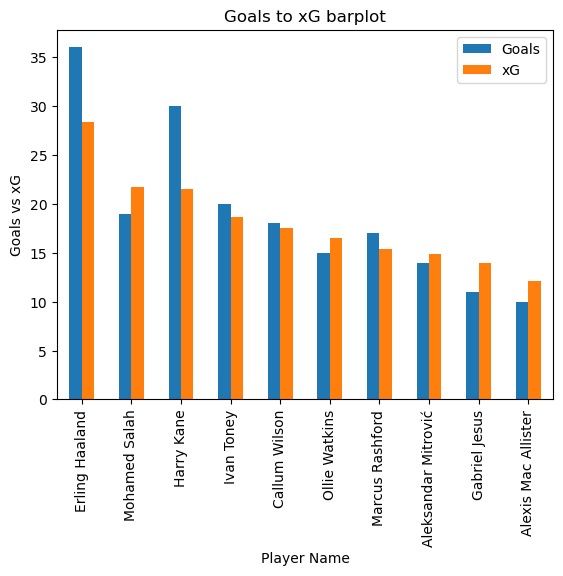

In [172]:
top10xG.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar"
)
plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")

# # Most Goals

The next visualzation in this dataset is collecting and showing the players that scored the most goals over the span of the 2022/2023 season
from the highest number of goals: "PlayerName(Goals)"
The top three most notable scorers are 
1.)Erling Haaland(36)
2.)Harry kane(30)
3.)Ivan Toney(20)


<AxesSubplot:xlabel='Goals', ylabel='Player'>

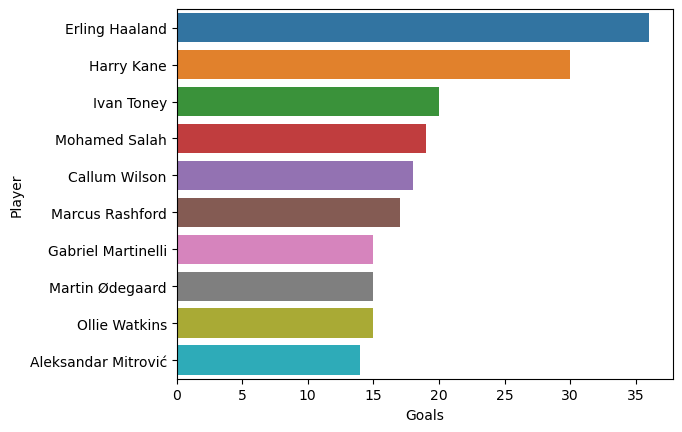

In [173]:
#Returning the top 10 highest goal scorers in the 2022/2023 season first by sorting the dataset by the amount of goals each person scored.
top10Goals = shooting_df.sort_values(by='Goals',ascending=False).head(10)
#simple barplot to show the amount of goals scored by each player 
sns.barplot(x='Goals',y='Player',data=top10Goals)

# # Most Effecient Scorers

Players with the most goals scored with the best conversion rate per shot

Very Insightful, theres a new set of players that joined the list, players with a very common similarity amongst them, mostly come from Arsenal. Three very impactful players to the new playstyle of, these players are Martinelli, Saka and Odegaard

Text(0, 0.5, 'Goals vs xG')

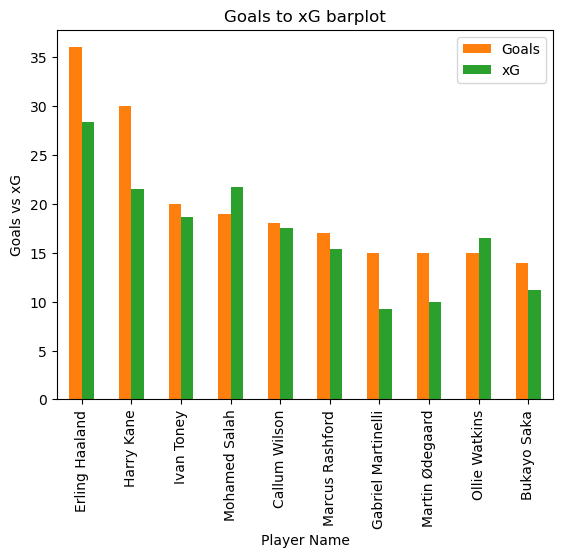

In [174]:
Most_effecient = shooting_df.sort_values(by=['Goals','Goal-xG','Shot_Target_Rate'],ascending=False)
top10eff=Most_effecient.head(10)

top10eff.reset_index().plot(
    x="Player", y=["Goals", "xG"], kind="bar", color=['#ff7f0e', '#2ca02c']
)

plt.title("Goals to xG barplot")
plt.xlabel("Player Name")
plt.ylabel("Goals vs xG")




In [175]:
"""The top 20 players with the most effecient scoring grouped by the team they play for - Returns Arsenal as the most effecient team based of the team
with the most players amongst the top 20 list for effeciency 
 """
top20eff = Most_effecient.head(20)
mosteffecientTeam= top20eff.groupby('Squad').count()

mosteffecientTeam.rename(columns= {'Player':'Count'},inplace=True)
mosteffecientTeam.reset_index(inplace=True)
sort_highest(mosteffecientTeam[['Squad','Count']],'Count')

,Squad,Count
0,Arsenal,4
10,Newcastle Utd,3
7,Liverpool,2
8,Manchester City,2
1,Aston Villa,1
2,Brentford,1
3,Crystal Palace,1
4,Fulham,1
5,Leeds United,1
6,Leicester City,1


# # Best scoring Defender



In [181]:
defender_shooting = shooting_df[shooting_df['Position'].str.contains('DF')]
sort_highest(defender_shooting,'Goals')


defender_shooting.reset_index(inplace=True,drop='index')

defender_shooting.Position= defender_shooting.Position.str.replace('MF,DF','DF,MF')
defender_shooting.Position= defender_shooting.Position.str.replace('FW,DF','DF,FW')







defender_shooting.head(10)


,Player,Nation,Position,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,Pascal Groß,de GER,"DF,MF",Brighton,31,36.0,9,39,19,48.7,...,0.53,0.23,0.47,0,0,5.4,5.4,0.14,3.6,3.6
1,Solly March,eng ENG,"DF,FW",Brighton,28,30.2,7,74,31,41.9,...,1.03,0.09,0.23,0,0,8.1,8.1,0.11,-1.1,-1.1
2,Bobby Reid,jm JAM,"DF,FW",Fulham,29,27.5,4,31,10,32.3,...,0.36,0.13,0.40,0,0,3.9,3.9,0.13,0.1,0.1
3,Ethan Pinnock,jm JAM,DF,Brentford,29,30.0,3,15,8,53.3,...,0.27,0.20,0.38,0,0,3.0,3.0,0.21,0.0,0.0
4,Vitaly Janelt,de GER,"DF,MF",Brentford,24,24.5,3,14,5,35.7,...,0.20,0.21,0.60,0,0,2.4,2.4,0.17,0.6,0.6
5,Rasmus Nissen,dk DEN,DF,Leeds United,25,21.8,3,13,5,38.5,...,0.23,0.23,0.60,0,0,0.8,0.8,0.06,2.2,2.2
6,Virgil van Dijk,nl NED,DF,Liverpool,31,31.5,3,30,9,30.0,...,0.29,0.10,0.33,0,0,2.6,2.6,0.09,0.4,0.4
7,Pedro Porro,es ESP,"DF,MF",Tottenham,22,12.6,3,26,7,26.9,...,0.56,0.12,0.43,0,0,1.8,1.8,0.07,1.2,1.2
8,Ben Mee,eng ENG,DF,Brentford,32,36.3,3,28,7,25.0,...,0.19,0.11,0.43,0,0,3.2,3.2,0.12,-0.2,-0.2
9,Gabriel Dos Santos,br BRA,DF,Arsenal,24,37.9,3,32,9,28.1,...,0.24,0.09,0.33,0,0,5.1,5.1,0.16,-2.1,-2.1


<AxesSubplot:>

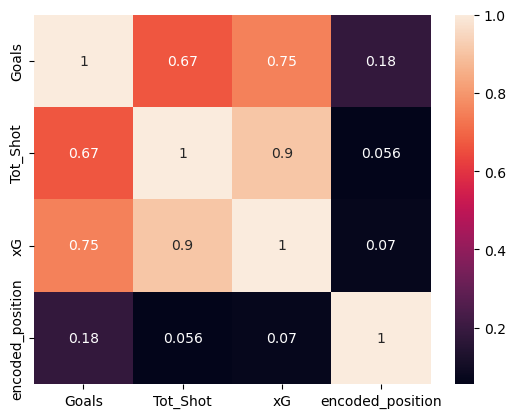

In [185]:

from sklearn.preprocessing import LabelEncoder

le_position = LabelEncoder()

defender_shooting['encoded_position'] = le_position.fit_transform(defender_shooting['Position'])

correlation_features= defender_shooting[['Position','Goals','Tot_Shot','xG','encoded_position']]

correlation_pos= correlation_features.corr()

sns.heatmap(correlation_pos,annot=True)


,Player,Nation,Pos,Squad,Age,90s_played,Goals,Tot_Shot,Shot_On_Target,Shot_Target_Rate,...,ShotTargetPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
0,Erling Haaland,no NOR,FW,Manchester City,22,30.8,36,116,53,45.7,...,1.72,0.25,0.55,7,7,28.4,23.0,0.20,7.6,6.0
1,Mohamed Salah,eg EGY,FW,Liverpool,30,36.6,19,121,45,37.2,...,1.23,0.14,0.38,2,4,21.7,18.5,0.15,-2.7,-1.5
2,Harry Kane,eng ENG,FW,Tottenham,29,37.8,30,124,54,43.5,...,1.43,0.20,0.46,5,6,21.5,16.7,0.13,8.5,8.3
3,Ivan Toney,eng ENG,FW,Brentford,26,32.8,20,87,33,37.9,...,1.01,0.16,0.42,6,7,18.7,13.2,0.15,1.3,0.8
4,Callum Wilson,eng ENG,FW,Newcastle Utd,30,20.9,18,70,31,44.3,...,1.49,0.21,0.48,3,3,17.5,15.1,0.22,0.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Yasin Ayari,se SWE,MF,Brighton,18,0.7,0,1,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.02,0.0,0.0
565,Ethan Nwaneri,eng ENG,FW,Arsenal,15,0.0,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
566,Odeluga Offiah,eng ENG,DF,Brighton,19,0.3,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0
567,Robin Olsen,se SWE,GK,Aston Villa,32,3.1,0,0,0,0.0,...,0.00,0.00,0.00,0,0,0.0,0.0,0.00,0.0,0.0


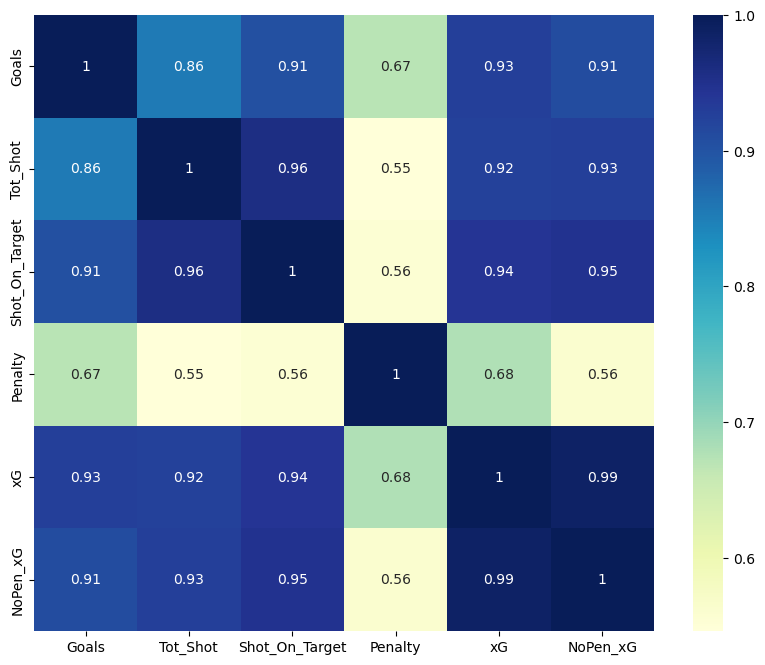

In [ ]:

#According to the dateset these are the players which accumulated the most xG over the course of the season
#as we determine who had the most amount of goals during the season 
featureData = shooting_df[['Goals','Tot_Shot','Shot_On_Target','Penalty','xG','NoPen_xG']]


shot_correlation=featureData.corr()
plt.figure(figsize=(10,8))
sns.heatmap(shot_correlation,cmap="YlGnBu",annot=True)


shooting_df

Next we will create a bar chart to show the players that scored and also took the most shots over the course of the season

In [ ]:
top20Shots = shooting_df.sort_values(by='Tot_Shot',ascending=False).head(20)
top20Goals = shooting_df.sort_values(by='Goals',ascending=False).head(20)
squad_count = top20Goals['Squad'].value_counts()

squad_count







Arsenal            4
Manchester City    2
Tottenham          2
Liverpool          2
Newcastle Utd      2
Leicester City     2
Brentford          1
Manchester Utd     1
Aston Villa        1
Fulham             1
Leeds United       1
Brighton           1
Name: Squad, dtype: int64

In [ ]:
"""res=op.scatterplot(shooting_df, 
               x="Goals",
               y="xG", 
               category=['Squad'],
                marginal_dist=True,
                kde=True,
                regression=True,
                save="shooting.png")"""

'res=op.scatterplot(shooting_df, \n               x="Goals",\n               y="xG", \n               category=[\'Squad\'],\n                marginal_dist=True,\n                kde=True,\n                regression=True,\n                save="shooting.png")'

In [ ]:
PerTeam_shooting_df=shooting_df.groupby(by='Squad')
PerTeam_shooting_df

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

reg = LinearRegression()

x=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

reg.fit(X_train,y_train)

print(reg.score(X_test,y_test))

y_pred=reg.predict(X_test)

Cristiano_pred_stats=reg.predict([[110,43,17.42,14]])
vardy_stats = reg.predict([[115,53,22.30,17]])


print(Cristiano_pred_stats)

print(vardy_stats)


0.8966171449937769
[18.48489722]
[25.11966908]


In [ ]:
from sklearn.model_selection import cross_val_score

linear_score = cross_val_score(reg, X_train, y_train, cv=4)
np.average(linear_score)

linear_score





array([0.8637174 , 0.77859475, 0.81891086, 0.90501313])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

X=shooting_df[['Tot_Shot','Shot_On_Target','xG','NoPen_xG']]
y=shooting_df['Goals']



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

model = DecisionTreeRegressor()

model.fit(X_train,y_train)

print(model.predict([[110,43,17.42,14]]))



print(model.score(X_test,y_test))


print(y_test)

[18.]
0.7423818579254238
32     10
562     0
310     0
458     0
104     5
       ..
30     11
73      2
107     3
46      5
106     1
Name: Goals, Length: 171, dtype: int64


In [ ]:
DecisionTreeRegressor_score = cross_val_score(model, X_train, y_train, cv=4)
np.average(DecisionTreeRegressor_score)

DecisionTreeRegressor_score


array([0.69923072, 0.65136986, 0.7730333 , 0.64048952])

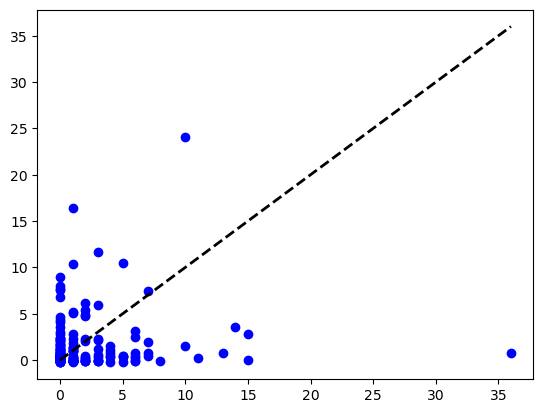

In [ ]:
plt.scatter(y_test,y_pred,color='Blue')

plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()

Text(0, 0.5, 'xG')

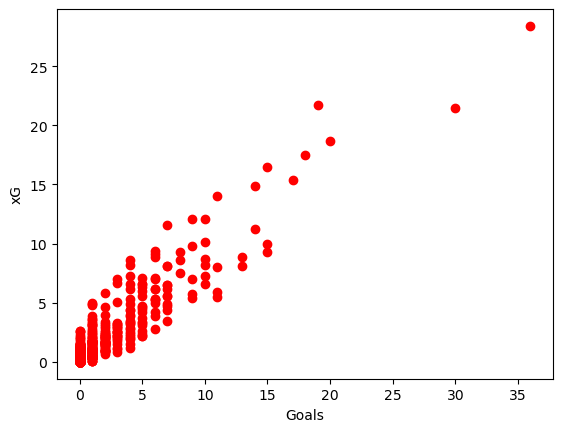

In [ ]:
plt.scatter(x='Goals',y='xG', data=shooting_df,c='Red')
#plt.plot(x,y,color='green')
plt.xlabel('Goals')
plt.ylabel('xG')

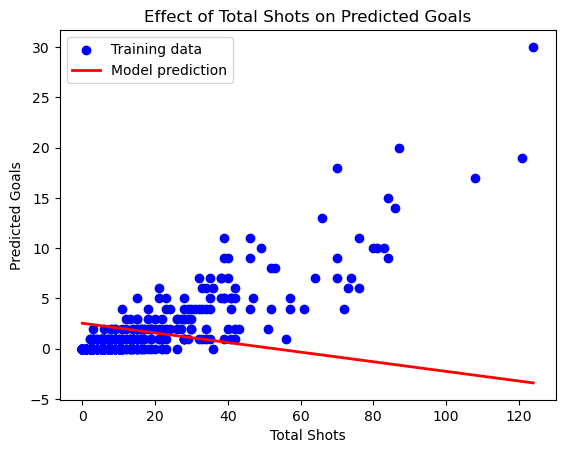

In [ ]:
import numpy as np  
  
# Get the mean values for the features  
mean_values = np.mean(X_train, axis=0)  
  
# Now, let's choose 'Tot_Shot' (the first feature) and vary it across its range  
# while keeping the other features fixed at their mean values.  
tot_shots_range = np.linspace(X_train['Tot_Shot'].min(), X_train['Tot_Shot'].max(), 100)  
predictions = []  
  
for shot in tot_shots_range:  
    # We create a feature vector where 'Tot_Shot' varies, but other features are constant  
    feature_vector = np.array([shot, mean_values['Shot_On_Target'], mean_values['xG'], mean_values['NoPen_xG']])  
    # Predict the goal for each feature vector  
    predicted_goal = reg.predict([feature_vector])  
    predictions.append(predicted_goal)  
  
# Plot the relationship between 'Tot_Shot' and predicted goals  
plt.scatter(X_train['Tot_Shot'], y_train, color='blue', label='Training data')  
plt.plot(tot_shots_range, predictions, color='red', linewidth=2, label='Model prediction')  
plt.xlabel('Total Shots')  
plt.ylabel('Predicted Goals')  
plt.title('Effect of Total Shots on Predicted Goals')  
plt.legend()  
plt.show()  


,Age,Total Goals
0,15,0
1,16,0
2,17,8
3,18,10
4,19,7
5,20,29
6,21,49
7,22,128
8,23,97
9,24,102


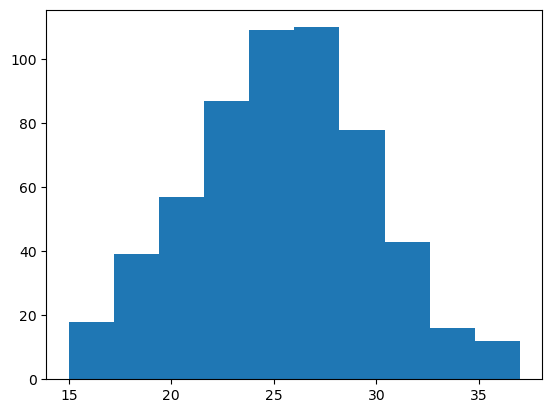

In [ ]:

Age_group=shooting_df.groupby(by='Age')['Goals'].sum().reset_index()
Age_group.rename(columns={'Goals':'Total Goals'},inplace=True)
age_dist = plt.hist(shooting_df['Age'])
Age_group

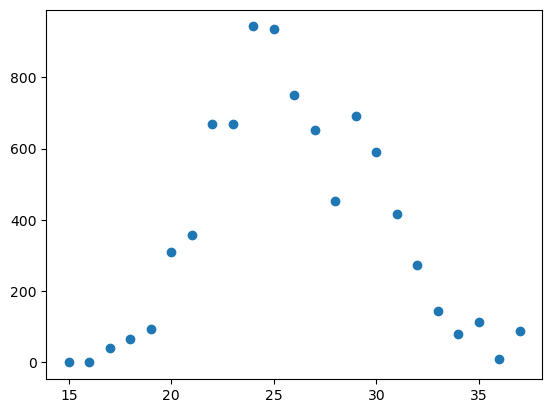

In [ ]:

FullGames_group=shooting_df.groupby(by='Age')['90s_played'].sum().reset_index()
FullGames_group.rename(columns={'90s_played':'Total_90s'},inplace=True)
plt.scatter(x='Age',y='Total_90s',data=FullGames_group)

In [ ]:
features_to_sum= ['Squad','Goals','Tot_Shot','Shot_On_Target','TotalShotPer90','Goal/TotShot','Goal/ShotTarget','Penalty','Att_Penalty','xG','NoPen_xG','NoPen_xGperShot','Goal-xG','NoPen_Goal-xG']
features_for_average = ['Squad','Age','90s_played','Shot_Target_Rate']
squad_totals=shooting[features_to_sum].groupby('Squad').sum()
#squad_totals.drop(columns=['Unnamed: 0'],inplace=True)
averages= shooting_df[features_for_average].groupby('Squad').mean()

new_df = averages.join(squad_totals, how='inner', on= 'Squad')
new_df[['Age','90s_played','Shot_Target_Rate']] = new_df[['Age','90s_played','Shot_Target_Rate']].round(2)

new_df

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
Squad,,,,,,,,,,,,,,,,
Arsenal,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
Aston Villa,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1
Bournemouth,25.26,13.48,24.93,37,358,126,25.83,1.72,4.83,0,0,39.6,39.6,2.40,-2.6,-2.6
Brentford,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
Brighton,23.48,14.42,23.52,68,607,219,54.76,1.78,4.48,6,6,75.6,70.8,2.74,-7.6,-8.8
Chelsea,24.66,13.03,26.02,37,481,151,41.85,1.63,5.35,3,3,50.1,47.7,2.62,-13.1,-13.7
Crystal Palace,25.65,16.03,21.23,38,423,133,24.62,1.47,3.71,1,3,39.9,37.4,2.03,-1.9,-0.4
Everton,25.43,14.90,27.05,32,426,143,33.53,1.57,4.73,3,3,46.3,44.0,2.75,-14.3,-15.0
Fulham,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7


# # Most goals scored 

In [ ]:
sort_highest(new_df,'Goals')

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
Squad,,,,,,,,,,,,,,,,
Manchester City,25.46,17.38,22.25,92,590,205,30.78,1.75,5.26,9,10,80.4,72.6,2.03,11.6,10.4
Arsenal,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
Liverpool,25.36,14.91,25.48,71,601,203,39.69,2.13,5.55,2,4,73.5,70.3,2.40,-2.5,-1.3
Tottenham,25.14,14.40,23.79,68,512,186,43.59,2.16,6.27,5,6,58.0,53.2,2.03,10.0,9.8
Brighton,23.48,14.42,23.52,68,607,219,54.76,1.78,4.48,6,6,75.6,70.8,2.74,-7.6,-8.8
Newcastle Utd,26.37,15.45,19.58,64,565,184,36.35,1.45,4.42,6,6,74.5,69.8,2.09,-10.5,-11.8
Brentford,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
Manchester Utd,25.62,16.04,25.93,56,590,206,37.12,1.47,4.71,3,3,69.2,66.9,2.45,-13.2,-13.9
Fulham,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7


In [ ]:
sort_highest(new_df, 'Goal-xG')

,Age,90s_played,Shot_Target_Rate,Goals,Tot_Shot,Shot_On_Target,TotalShotPer90,Goal/TotShot,Goal/ShotTarget,Penalty,Att_Penalty,xG,NoPen_xG,NoPen_xGperShot,Goal-xG,NoPen_Goal-xG
Squad,,,,,,,,,,,,,,,,
Manchester City,25.46,17.38,22.25,92,590,205,30.78,1.75,5.26,9,10,80.4,72.6,2.03,11.6,10.4
Arsenal,23.96,16.07,24.88,84,589,194,33.40,3.25,8.02,3,4,73.4,70.5,2.06,10.6,10.5
Tottenham,25.14,14.40,23.79,68,512,186,43.59,2.16,6.27,5,6,58.0,53.2,2.03,10.0,9.8
Fulham,26.48,14.38,24.58,52,420,137,37.91,2.40,6.57,5,9,47.4,40.3,1.93,4.6,6.7
Crystal Palace,25.65,16.03,21.23,38,423,133,24.62,1.47,3.71,1,3,39.9,37.4,2.03,-1.9,-0.4
Aston Villa,26.58,16.06,21.19,49,427,145,31.26,1.50,4.39,3,4,51.2,48.1,1.81,-2.2,-2.1
Southampton,23.81,11.61,25.00,36,413,132,28.38,1.55,4.49,2,4,38.2,35.0,1.84,-2.2,-1.0
Brentford,25.00,16.72,29.19,56,400,147,32.90,1.75,4.56,7,8,58.3,52.0,2.67,-2.3,-3.0
Liverpool,25.36,14.91,25.48,71,601,203,39.69,2.13,5.55,2,4,73.5,70.3,2.40,-2.5,-1.3
